In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multiple Layer GRU

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.5.0


In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.5.0


In [4]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIHMYEF/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIHMYEF/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIHMYEF/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [5]:
tokenizer = info.features['text'].encoder

In [7]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE,  tf.compat.v1.data.get_output_shapes(train_dataset)) #train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))#test_dataset.output_shapes)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 72s 101ms/step - loss: 0.4702 - accuracy: 0.7574 - val_loss: 0.3230 - val_accuracy: 0.8765
Epoch 2/10
391/391 [==============================] - 20s 50ms/step - loss: 0.2350 - accuracy: 0.9144 - val_loss: 0.3046 - val_accuracy: 0.8819
Epoch 3/10
391/391 [==============================] - 19s 46ms/step - loss: 0.1767 - accuracy: 0.9366 - val_loss: 0.3338 - val_accuracy: 0.8752
Epoch 4/10
391/391 [==============================] - 18s 43ms/step - loss: 0.1409 - accuracy: 0.9505 - val_loss: 0.3731 - val_accuracy: 0.8729
Epoch 5/10
391/391 [==============================] - 17s 40ms/step - loss: 0.1138 - accuracy: 0.9608 - val_loss: 0.4099 - val_accuracy: 0.8689
Epoch 6/10
391/391 [==============================] - 17s 40ms/step - loss: 0.0930 - accuracy: 0.9686 - val_loss: 0.4922 - val_accuracy: 0.8646
Epoch 7/10
391/391 [==============================] - 16s 39ms/step - loss: 0.0727 - accuracy: 0.9769 - val_loss: 0.5407 - val_accuracy

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

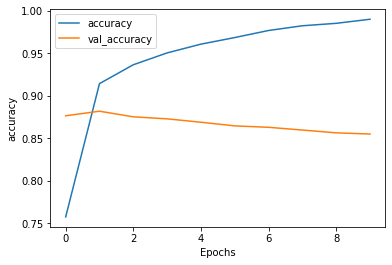

In [13]:
plot_graphs(history, 'accuracy')

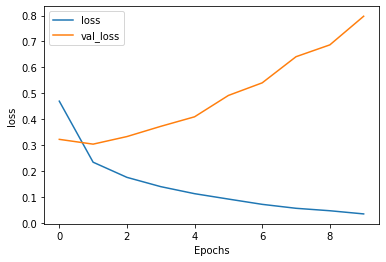

In [14]:
plot_graphs(history, 'loss')